# LOAD THE LIBRARIES AND DATASET

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [3]:
df=pd.read_excel("/content/cust_data.xlsx")
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


# ANALYZING THE DATA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

# PERFORMING EDA

**FILLING NULL VLAUES**

In [5]:
df["Gender"]=df["Gender"].fillna(df["Gender"].mode()[0])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  30000 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

<Axes: >

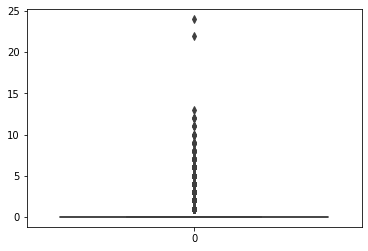

In [7]:
sns.boxplot(df["Jordan"])

**ENCODING**

In [8]:
df["Gender"].value_counts()

F    24778
M     5222
Name: Gender, dtype: int64

In [9]:
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])

In [10]:
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,1,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,1,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [11]:
df.drop("Cust_ID",axis=1,inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  30000 non-null  int64
 1   Orders                  30000 non-null  int64
 2   Jordan                  30000 non-null  int64
 3   Gatorade                30000 non-null  int64
 4   Samsung                 30000 non-null  int64
 5   Asus                    30000 non-null  int64
 6   Udis                    30000 non-null  int64
 7   Mondelez International  30000 non-null  int64
 8   Wrangler                30000 non-null  int64
 9   Vans                    30000 non-null  int64
 10  Fila                    30000 non-null  int64
 11  Brooks                  30000 non-null  int64
 12  H&M                     30000 non-null  int64
 13  Dairy Queen             30000 non-null  int64
 14  Fendi                   30000 non-null  int64
 15  Hewlett Packard    

# KMEANS

In [13]:
wcss=[]
for i in range(1,21):
  km=KMeans(n_clusters = i)
  km.fit(df)
  wcss.append(km.inertia_)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

In [14]:
wcss

[922806.4653666681,
 620898.7650530578,
 574909.2230452211,
 547374.0257123167,
 527578.1049633357,
 511498.057420591,
 496826.4070433213,
 484367.7707402232,
 477164.3218291424,
 464885.98379501177,
 459648.10428065096,
 450760.7083304478,
 446837.02951779345,
 436404.48529502016,
 431967.93341958267,
 425567.7271515188,
 421220.4230875147,
 416192.21834188735,
 409215.43489067524,
 406746.11110422097]

Text(0.5, 1.0, 'Cluster Analysis')

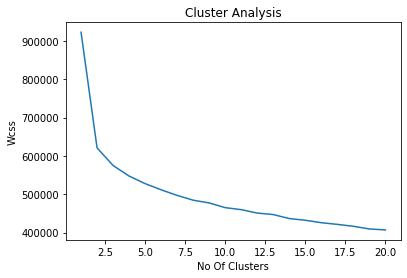

In [15]:
plt.plot(range(1,21),wcss)
plt.xlabel("No Of Clusters")
plt.ylabel("Wcss")
plt.title("Cluster Analysis")

**KMEANS WITH 7 CLUSTERS**

In [16]:
kmeans=KMeans(n_clusters=7)
y_pred=kmeans.fit_predict(df)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
y_pred

array([1, 4, 1, ..., 3, 3, 0], dtype=int32)

In [18]:
df["Clusters"]=kmeans.labels_

In [19]:
df["Clusters"]

0        1
1        4
2        1
3        3
4        5
        ..
29995    3
29996    3
29997    3
29998    3
29999    0
Name: Clusters, Length: 30000, dtype: int32

<Axes: >

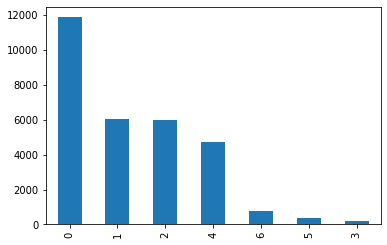

In [ ]:
df["Clusters"].value_counts().plot(kind='bar')

# SILHOUETTE SCORE

In [ ]:
from sklearn.metrics import silhouette_score
print(silhouette_score(df.iloc[:,:-1],labels=df["Clusters"]))

0.15045296203462988


In [ ]:
df.groupby(df["Clusters"])["Orders"].sum()

Clusters
0     7127
1    42410
2    23696
3      847
4    46682
5     1792
6     2540
Name: Orders, dtype: int64

In [20]:
kmeans.cluster_centers_

array([[ 0.17847646,  2.96152041,  0.27358048,  0.25637416,  0.22900047,
         0.15563898,  0.14437666,  0.13858908,  0.10667918,  0.10480213,
         0.09009855,  0.1268575 ,  0.30768028,  0.12028781,  0.1387455 ,
         0.15376193,  0.06960738,  0.18739246,  0.02674801,  0.66682309,
         0.22383857,  0.37994682,  0.25308932,  0.09807602,  0.03253559,
         0.3175348 ,  0.11512592,  0.09056781,  0.25840763,  0.36430471,
         0.13530424,  0.07977475,  0.05740654,  0.1647114 ,  0.10746129,
         0.07883623,  0.04849054],
       [ 0.1805579 ,  6.04142012,  0.28284024,  0.25038039,  0.23584108,
         0.17058326,  0.15384615,  0.14387151,  0.10549451,  0.10972105,
         0.0887574 ,  0.12392223,  0.34404057,  0.12983939,  0.13998309,
         0.15756551,  0.07590871,  0.18241758,  0.03296703,  0.69923922,
         0.21927303,  0.39256128,  0.25714286,  0.10819949,  0.02400676,
         0.33558749,  0.11242604,  0.0772612 ,  0.27218935,  0.3783601 ,
         0.13744